=== Exercício 5: Pipeline Completo ===
Dispositivo utilizado: cpu
Modelo criado com 101770 parâmetros

Epoch 1/3
--------------------------------------------------
Batch 0, Loss: 2.3201
Batch 200, Loss: 0.2198
Batch 400, Loss: 0.2969
Batch 600, Loss: 0.0830
Batch 800, Loss: 0.2874
Train Loss: 0.2606, Train Acc: 92.29%
Test Loss: 0.1332, Test Acc: 95.69%

Epoch 2/3
--------------------------------------------------
Batch 0, Loss: 0.0960
Batch 200, Loss: 0.1674
Batch 400, Loss: 0.0946
Batch 600, Loss: 0.0859
Batch 800, Loss: 0.0308
Train Loss: 0.1128, Train Acc: 96.58%
Test Loss: 0.1019, Test Acc: 96.73%

Epoch 3/3
--------------------------------------------------
Batch 0, Loss: 0.0366
Batch 200, Loss: 0.1251
Batch 400, Loss: 0.1063
Batch 600, Loss: 0.0386
Batch 800, Loss: 0.1243
Train Loss: 0.0820, Train Acc: 97.48%
Test Loss: 0.0925, Test Acc: 97.17%


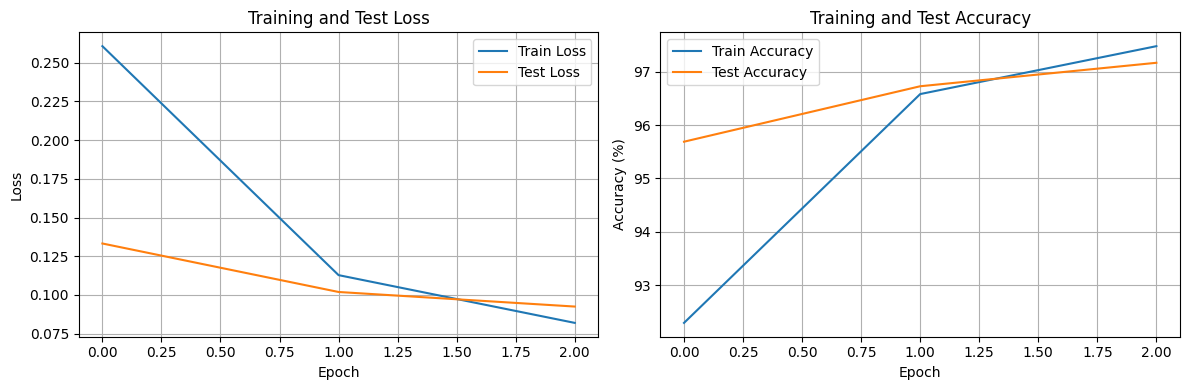


Treinamento concluído!
Melhor acurácia de teste: 97.17%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Modelo simples para classificação
class SimpleNet(nn.Module):
    def __init__(self, input_size=28*28, hidden_size=128, num_classes=10):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Configuração
print("=== Exercício 5: Pipeline Completo ===")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Dispositivo utilizado: {device}")

# Transformações
train_transform = transforms.Compose([
    transforms.RandomRotation(5),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Datasets e DataLoaders
train_dataset = datasets.MNIST('./data', train=True, transform=train_transform, download=True)
test_dataset = datasets.MNIST('./data', train=False, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Modelo, loss e otimizador
model = SimpleNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(f"Modelo criado com {sum(p.numel() for p in model.parameters())} parâmetros")

# Função de treinamento
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (data, target) in enumerate(dataloader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

        if batch_idx % 200 == 0:
            print(f'Batch {batch_idx}, Loss: {loss.item():.4f}')

    return running_loss / len(dataloader), 100. * correct / total

# Função de teste
def test(model, dataloader, criterion, device):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in dataloader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            test_loss += criterion(outputs, target).item()
            _, predicted = outputs.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    test_loss /= len(dataloader)
    accuracy = 100. * correct / total
    return test_loss, accuracy

# Treinamento
num_epochs = 3
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    print(f'\nEpoch {epoch+1}/{num_epochs}')
    print('-' * 50)

    # Treinar
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Testar
    test_loss, test_acc = test(model, test_loader, criterion, device)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
    print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

# Visualizar resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Loss
ax1.plot(train_losses, label='Train Loss')
ax1.plot(test_losses, label='Test Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Test Loss')
ax1.legend()
ax1.grid(True)

# Accuracy
ax2.plot(train_accuracies, label='Train Accuracy')
ax2.plot(test_accuracies, label='Test Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training and Test Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"\nTreinamento concluído!")
print(f"Melhor acurácia de teste: {max(test_accuracies):.2f}%")